# Libraries

In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from datetime import datetime

# Set style for better visuals
plt.style.use('seaborn')

/tmp/ipykernel_49534/3166615292.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Dataset Loading

In [509]:
df = pd.read_csv('./dataset/bustabit.csv')

# EDA

In [510]:
df.head()

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20T19:44:19Z
1,10676217,3343882,znay22,3,NaN,NaN,NaN,1.40,2016-11-14T14:21:50Z
2,15577107,3374646,rrrrrrrr,4,1.33,3.0,1.44,3.15,2016-11-23T06:39:15Z
3,25732127,3429241,sanya1206,10,NaN,NaN,NaN,1.63,2016-12-08T18:13:55Z
4,17995432,3389174,ADM,50,1.50,1.4,25.70,2.29,2016-11-27T08:14:48Z


# Replacing NaN Values with 0 in DataFrame

In [511]:
df.fillna(0, inplace=True)

In [512]:
df.head()

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20T19:44:19Z
1,10676217,3343882,znay22,3,0.00,0.0,0.00,1.40,2016-11-14T14:21:50Z
2,15577107,3374646,rrrrrrrr,4,1.33,3.0,1.44,3.15,2016-11-23T06:39:15Z
3,25732127,3429241,sanya1206,10,0.00,0.0,0.00,1.63,2016-12-08T18:13:55Z
4,17995432,3389174,ADM,50,1.50,1.4,25.70,2.29,2016-11-27T08:14:48Z


# Target Variable Creation

In [513]:
# Convert 'PlayDate' to datetime
df['PlayDate'] = pd.to_datetime(df['PlayDate'])

# Find the last date in the dataset
latest_date = df['PlayDate'].max()

# Group by player and find their last activity date
player_churn_activity = df.groupby('Username')['PlayDate'].max().reset_index()

# Define churn threshold (e.g., 30 days)
churn_threshold_days = 4
player_churn_activity['Churned'] = (
    (latest_date - player_churn_activity['PlayDate']) > pd.Timedelta(days=churn_threshold_days)
).astype(int)

In [514]:
churn_counts = player_churn_activity['Churned'].value_counts()
print(churn_counts)

Churned
1    3245
0     904
Name: count, dtype: int64


In [515]:
player_churn_activity.head(10)

,Username,PlayDate,Churned
0,----------------,2016-11-03 20:26:24+00:00,1
1,--dilib--,2016-11-03 17:35:53+00:00,1
2,-31337-,2016-12-09 20:33:22+00:00,0
3,-Nothing-,2016-12-06 15:27:27+00:00,1
4,-Tachyon,2016-11-01 23:10:05+00:00,1
5,-Y-,2016-10-31 16:48:46+00:00,1
6,-ZYBERPH-,2016-11-18 12:17:08+00:00,1
7,-_-TUYUL-_-,2016-12-06 14:04:37+00:00,1
8,-__---,2016-12-08 20:49:55+00:00,0
9,-i_,2016-11-03 21:11:52+00:00,1


In [516]:
# Merge churn status with original data
df = df.merge(player_churn_activity[['Username', 'Churned']], on='Username')

In [517]:
df.head(5)

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Churned
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20 19:44:19+00:00,1
1,14371418,3367200,papai,5,1.20,3.0,1.15,1.20,2016-11-21 03:51:34+00:00,1
2,14306198,3366697,papai,5,0.00,0.0,0.00,1.16,2016-11-21 00:28:45+00:00,1
3,15842561,3376103,papai,1,1.05,3.0,0.08,1.70,2016-11-23 16:31:24+00:00,1
4,13098255,3358777,papai,20,1.20,0.0,4.00,3.43,2016-11-18 18:57:36+00:00,1


In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Id         50000 non-null  int64              
 1   GameID     50000 non-null  int64              
 2   Username   50000 non-null  object             
 3   Bet        50000 non-null  int64              
 4   CashedOut  50000 non-null  float64            
 5   Bonus      50000 non-null  float64            
 6   Profit     50000 non-null  float64            
 7   BustedAt   50000 non-null  float64            
 8   PlayDate   50000 non-null  datetime64[ns, UTC]
 9   Churned    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(4), object(1)
memory usage: 3.8+ MB


In [519]:
unique_players = df['Username'].nunique()

In [520]:
unique_players

4149

In [521]:
df1 = df.groupby('Username')

In [522]:
df1.head()

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Churned
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20 19:44:19+00:00,1
1,14371418,3367200,papai,5,1.20,3.0,1.15,1.20,2016-11-21 03:51:34+00:00,1
2,14306198,3366697,papai,5,0.00,0.0,0.00,1.16,2016-11-21 00:28:45+00:00,1
3,15842561,3376103,papai,1,1.05,3.0,0.08,1.70,2016-11-23 16:31:24+00:00,1
4,13098255,3358777,papai,20,1.20,0.0,4.00,3.43,2016-11-18 18:57:36+00:00,1
...,...,...,...,...,...,...,...,...,...,...
49995,9979296,3340244,PrisonBreak,4,0.00,0.0,0.00,1.27,2016-11-13 13:53:18+00:00,1
49996,7619064,3329342,Nipar,500,0.00,0.0,0.00,1.42,2016-11-10 11:33:40+00:00,1
49997,7600259,3329261,FDimarin,1,0.00,0.0,0.00,1.58,2016-11-10 11:00:20+00:00,1
49998,16290931,3378860,FokJulleNaaiers,4000,1.20,0.0,800.00,2.47,2016-11-24 11:16:28+00:00,1


# Feature Engineering

In [523]:
df.head()

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Churned
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20 19:44:19+00:00,1
1,14371418,3367200,papai,5,1.20,3.0,1.15,1.20,2016-11-21 03:51:34+00:00,1
2,14306198,3366697,papai,5,0.00,0.0,0.00,1.16,2016-11-21 00:28:45+00:00,1
3,15842561,3376103,papai,1,1.05,3.0,0.08,1.70,2016-11-23 16:31:24+00:00,1
4,13098255,3358777,papai,20,1.20,0.0,4.00,3.43,2016-11-18 18:57:36+00:00,1


In [524]:
# Step 1: Get the last, second-last, and third-last play dates per player

player_activity = (
    df.sort_values('PlayDate')
    .groupby('Username')['PlayDate']
    .agg([
        ('LastPlayDate', 'last'),  # Most recent play (always exists)
        ('SecondLastPlayDate', lambda x: x.iloc[-2] if len(x) >= 2 else pd.NaT),
        ('ThirdLastPlayDate', lambda x: x.iloc[-3] if len(x) >= 3 else pd.NaT)
    ])
    .reset_index()
)

# Calculate days with fillna(0) at the end
player_activity['DaysSinceLastPlay'] = (latest_date - player_activity['LastPlayDate']).dt.days
player_activity['DaysSinceSecondLastPlay'] = (latest_date - player_activity['SecondLastPlayDate']).dt.days.fillna(0)
player_activity['DaysSinceThirdLastPlay'] = (latest_date - player_activity['ThirdLastPlayDate']).dt.days.fillna(0)

In [525]:
player_activity.head(5)

,Username,LastPlayDate,SecondLastPlayDate,ThirdLastPlayDate,DaysSinceLastPlay,DaysSinceSecondLastPlay,DaysSinceThirdLastPlay
0,----------------,2016-11-03 20:26:24+00:00,2016-11-03 15:05:40+00:00,2016-11-03 06:14:27+00:00,36,37.0,37.0
1,--dilib--,2016-11-03 17:35:53+00:00,2016-11-03 08:48:12+00:00,2016-11-03 08:39:20+00:00,37,37.0,37.0
2,-31337-,2016-12-09 20:33:22+00:00,2016-12-09 19:56:00+00:00,2016-12-09 18:31:58+00:00,0,1.0,1.0
3,-Nothing-,2016-12-06 15:27:27+00:00,2016-12-06 15:01:15+00:00,2016-11-24 19:07:24+00:00,4,4.0,16.0
4,-Tachyon,2016-11-01 23:10:05+00:00,2016-11-01 22:50:26+00:00,2016-11-01 11:17:05+00:00,38,38.0,39.0


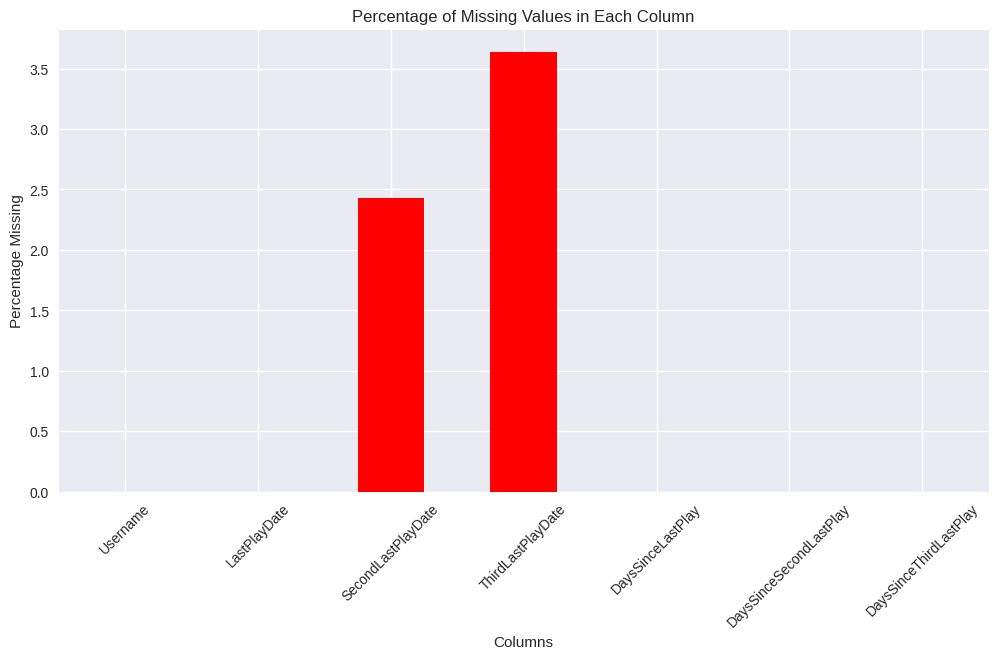

In [526]:
missing_data = player_activity.isnull().sum() / len(df) * 100

plt.figure(figsize=(12, 6))
missing_data.plot(kind='bar', color='red')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [527]:
# Define the time windows (in days)
time_windows = [4, 8, 12, 16, 20, 24, 28, 32, 36]

# Initialize a DataFrame to store results
player_bets_by_window = df[['Username']].drop_duplicates()

# Calculate bet sums for each time window
for days in time_windows:
    # Calculate cutoff date
    cutoff_date = latest_date - pd.Timedelta(days=days)
    
    # Filter bets and sum by player
    window_bets = (
        df[df['PlayDate'] >= cutoff_date]
        .groupby('Username')['Bet']
        .sum()
        .reset_index()
        .rename(columns={'Bet': f'BetsLast{days}Days'})
    )
    
    # Merge with main DataFrame
    player_bets_by_window = player_bets_by_window.merge(
        window_bets,
        on='Username',
        how='left'
    )

# Fill NA with 0 (for players with no bets in a window)
player_bets_by_window = player_bets_by_window.fillna(0)


In [528]:
player_bets_by_window.head()

,Username,BetsLast4Days,BetsLast8Days,BetsLast12Days,BetsLast16Days,BetsLast20Days,BetsLast24Days,BetsLast28Days,BetsLast32Days,BetsLast36Days
0,papai,0.0,0.0,0.0,0.0,32.0,227.0,227.0,227.0,227.0
1,znay22,826.0,999.0,1092.0,1295.0,1577.0,2097.0,2115.0,2279.0,2663.0
2,rrrrrrrr,40.0,68.0,68.0,68.0,1852.0,2458.0,2458.0,2458.0,2458.0
3,sanya1206,20.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0
4,ADM,338.0,12338.0,13388.0,13646.0,13646.0,13646.0,13646.0,13846.0,14575.0


In [529]:
player_bets_by_window.shape

(4149, 10)

In [530]:
player_activity.head()

,Username,LastPlayDate,SecondLastPlayDate,ThirdLastPlayDate,DaysSinceLastPlay,DaysSinceSecondLastPlay,DaysSinceThirdLastPlay
0,----------------,2016-11-03 20:26:24+00:00,2016-11-03 15:05:40+00:00,2016-11-03 06:14:27+00:00,36,37.0,37.0
1,--dilib--,2016-11-03 17:35:53+00:00,2016-11-03 08:48:12+00:00,2016-11-03 08:39:20+00:00,37,37.0,37.0
2,-31337-,2016-12-09 20:33:22+00:00,2016-12-09 19:56:00+00:00,2016-12-09 18:31:58+00:00,0,1.0,1.0
3,-Nothing-,2016-12-06 15:27:27+00:00,2016-12-06 15:01:15+00:00,2016-11-24 19:07:24+00:00,4,4.0,16.0
4,-Tachyon,2016-11-01 23:10:05+00:00,2016-11-01 22:50:26+00:00,2016-11-01 11:17:05+00:00,38,38.0,39.0


In [531]:
player_last_activity = player_bets_by_window.merge(player_activity[['Username', 'DaysSinceLastPlay', 'DaysSinceSecondLastPlay', 'DaysSinceThirdLastPlay']], on='Username')

In [532]:
player_last_activity.head()

,Username,BetsLast4Days,BetsLast8Days,BetsLast12Days,BetsLast16Days,BetsLast20Days,BetsLast24Days,BetsLast28Days,BetsLast32Days,BetsLast36Days,DaysSinceLastPlay,DaysSinceSecondLastPlay,DaysSinceThirdLastPlay
0,papai,0.0,0.0,0.0,0.0,32.0,227.0,227.0,227.0,227.0,17,18.0,18.0
1,znay22,826.0,999.0,1092.0,1295.0,1577.0,2097.0,2115.0,2279.0,2663.0,0,0.0,0.0
2,rrrrrrrr,40.0,68.0,68.0,68.0,1852.0,2458.0,2458.0,2458.0,2458.0,1,1.0,3.0
3,sanya1206,20.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,0,2.0,4.0
4,ADM,338.0,12338.0,13388.0,13646.0,13646.0,13646.0,13646.0,13846.0,14575.0,2,2.0,3.0


In [533]:
player_stats = df.groupby('Username').agg(
    TotalBetAmount=('Bet', 'sum'),
    TotalProfitAmount=('Profit', 'sum'),
    TotalBonusAmount=('Bonus', 'sum'),
    NumberOfBets=('Bet', 'count'),
    NumberOfBets_Won=('Profit', lambda x: (x > 0).sum()),  # Count wins (Profit > 0)
    NumberOfBets_Lost=('Profit', lambda x: (x <= 0).sum()), # Count losses (Profit <= 0)
    AverageBet=('Bet', 'mean'),
    MaxBet=('Bet', 'max'),
    MinBet=('Bet', 'min'),
    Churned=('Churned', 'first'),
).reset_index().sort_values('TotalBetAmount', ascending=False)

In [534]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4149 entries, 2004 to 3928
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Username           4149 non-null   object 
 1   TotalBetAmount     4149 non-null   int64  
 2   TotalProfitAmount  4149 non-null   float64
 3   TotalBonusAmount   4149 non-null   float64
 4   NumberOfBets       4149 non-null   int64  
 5   NumberOfBets_Won   4149 non-null   int64  
 6   NumberOfBets_Lost  4149 non-null   int64  
 7   AverageBet         4149 non-null   float64
 8   MaxBet             4149 non-null   int64  
 9   MinBet             4149 non-null   int64  
 10  Churned            4149 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 389.0+ KB


In [535]:
player_stats.head(5)

,Username,TotalBetAmount,TotalProfitAmount,TotalBonusAmount,NumberOfBets,NumberOfBets_Won,NumberOfBets_Lost,AverageBet,MaxBet,MinBet,Churned
2004,allg1124,16262350,4794154.34,85.12,101,74,27,161013.366337,1000000,39,0
133,Alexy,12216534,2421114.49,16.36,47,22,25,259926.255319,1000000,4371,0
3743,stevemoley,6173301,328758.17,15.56,25,22,3,246932.040000,1000000,1301,0
4114,zabby,5503821,562907.44,11.24,30,23,7,183460.700000,988571,8,0
2667,goosin2000,4469000,3803213.87,16.77,19,8,11,235210.526316,550000,70000,1


In [536]:
player_last_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Username                 4149 non-null   object 
 1   BetsLast4Days            4149 non-null   float64
 2   BetsLast8Days            4149 non-null   float64
 3   BetsLast12Days           4149 non-null   float64
 4   BetsLast16Days           4149 non-null   float64
 5   BetsLast20Days           4149 non-null   float64
 6   BetsLast24Days           4149 non-null   float64
 7   BetsLast28Days           4149 non-null   float64
 8   BetsLast32Days           4149 non-null   float64
 9   BetsLast36Days           4149 non-null   float64
 10  DaysSinceLastPlay        4149 non-null   int64  
 11  DaysSinceSecondLastPlay  4149 non-null   float64
 12  DaysSinceThirdLastPlay   4149 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 421.5+ KB


In [537]:
# Merge churn status with original data
final_df = player_stats.merge(player_last_activity[['Username', 'BetsLast4Days','BetsLast8Days','BetsLast12Days','BetsLast16Days','BetsLast20Days','BetsLast24Days','BetsLast28Days','BetsLast32Days','BetsLast36Days', 'DaysSinceLastPlay','DaysSinceSecondLastPlay','DaysSinceThirdLastPlay']], on='Username')

In [538]:
final_df.head(10)

,Username,TotalBetAmount,TotalProfitAmount,TotalBonusAmount,NumberOfBets,NumberOfBets_Won,NumberOfBets_Lost,AverageBet,MaxBet,MinBet,...,BetsLast12Days,BetsLast16Days,BetsLast20Days,BetsLast24Days,BetsLast28Days,BetsLast32Days,BetsLast36Days,DaysSinceLastPlay,DaysSinceSecondLastPlay,DaysSinceThirdLastPlay
0,allg1124,16262350,4794154.34,85.12,101,74,27,161013.366337,1000000,39,...,10835.0,70835.0,76865.0,7982234.0,9882234.0,14386330.0,15466330.0,0,0.0,0.0
1,Alexy,12216534,2421114.49,16.36,47,22,25,259926.255319,1000000,4371,...,12175954.0,12216534.0,12216534.0,12216534.0,12216534.0,12216534.0,12216534.0,1,1.0,1.0
2,stevemoley,6173301,328758.17,15.56,25,22,3,246932.040000,1000000,1301,...,584000.0,1634000.0,2273000.0,3902000.0,4107301.0,5106301.0,6173301.0,0,5.0,5.0
3,zabby,5503821,562907.44,11.24,30,23,7,183460.700000,988571,8,...,1260251.0,1285251.0,2691750.0,3484750.0,3484750.0,4388250.0,4425250.0,0,0.0,2.0
4,goosin2000,4469000,3803213.87,16.77,19,8,11,235210.526316,550000,70000,...,0.0,639000.0,1829000.0,2779000.0,2779000.0,3549000.0,3549000.0,13,15.0,15.0
5,maras,2628100,313451.23,17.32,24,15,9,109504.166667,509000,13000,...,0.0,0.0,0.0,0.0,425500.0,694500.0,1271000.0,27,27.0,27.0
6,period,2561200,196276.45,11.46,9,6,3,284577.777778,500000,32500,...,0.0,0.0,2561200.0,2561200.0,2561200.0,2561200.0,2561200.0,16,16.0,16.0
7,rickette,2170100,222161.56,21.51,18,13,5,120561.111111,892000,24000,...,1087900.0,2074100.0,2170100.0,2170100.0,2170100.0,2170100.0,2170100.0,7,9.0,10.0
8,goldman1,2146508,1271746.51,9.06,12,4,8,178875.666667,450000,6584,...,256508.0,746508.0,1646508.0,1896508.0,1896508.0,2146508.0,2146508.0,2,2.0,2.0
9,hindoong,2064000,65784.40,1.45,3,3,0,688000.000000,1000000,64000,...,2064000.0,2064000.0,2064000.0,2064000.0,2064000.0,2064000.0,2064000.0,0,0.0,0.0


In [539]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Username                 4149 non-null   object 
 1   TotalBetAmount           4149 non-null   int64  
 2   TotalProfitAmount        4149 non-null   float64
 3   TotalBonusAmount         4149 non-null   float64
 4   NumberOfBets             4149 non-null   int64  
 5   NumberOfBets_Won         4149 non-null   int64  
 6   NumberOfBets_Lost        4149 non-null   int64  
 7   AverageBet               4149 non-null   float64
 8   MaxBet                   4149 non-null   int64  
 9   MinBet                   4149 non-null   int64  
 10  Churned                  4149 non-null   int64  
 11  BetsLast4Days            4149 non-null   float64
 12  BetsLast8Days            4149 non-null   float64
 13  BetsLast12Days           4149 non-null   float64
 14  BetsLast16Days          

# Scale the data before training

In [540]:
cols_to_scale = ['TotalBetAmount','TotalProfitAmount','TotalBonusAmount',
                 'NumberOfBets','NumberOfBets_Won','NumberOfBets_Lost','AverageBet',
                 'MaxBet','MinBet', 'BetsLast4Days','BetsLast8Days','BetsLast12Days','BetsLast16Days',
                 'BetsLast20Days','BetsLast24Days','BetsLast28Days','BetsLast32Days','BetsLast36Days',
                 'DaysSinceLastPlay','DaysSinceSecondLastPlay','DaysSinceThirdLastPlay']

In [541]:
len(cols_to_scale)

21

In [542]:
from sklearn.preprocessing import MinMaxScaler

In [543]:
scaler = MinMaxScaler()

In [544]:
final_df[cols_to_scale] = scaler.fit_transform(final_df[cols_to_scale])

In [545]:
final_df.head(5)

,Username,TotalBetAmount,TotalProfitAmount,TotalBonusAmount,NumberOfBets,NumberOfBets_Won,NumberOfBets_Lost,AverageBet,MaxBet,MinBet,...,BetsLast12Days,BetsLast16Days,BetsLast20Days,BetsLast24Days,BetsLast28Days,BetsLast32Days,BetsLast36Days,DaysSinceLastPlay,DaysSinceSecondLastPlay,DaysSinceThirdLastPlay
0,allg1124,1.000000,1.000000,0.266700,0.344828,0.337900,0.110204,0.234030,1.000000,0.000079,...,0.000890,0.005798,0.006292,0.653396,0.808923,1.000000,1.000000,0.000,0.000,0.000
1,Alexy,0.751216,0.505014,0.051260,0.158621,0.100457,0.102041,0.377799,1.000000,0.009104,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.849177,0.789879,0.025,0.025,0.025
2,stevemoley,0.379607,0.068575,0.048753,0.082759,0.100457,0.012245,0.358912,1.000000,0.002708,...,0.047963,0.133753,0.186059,0.319403,0.336208,0.354941,0.399145,0.000,0.125,0.125
3,zabby,0.338439,0.117415,0.035217,0.100000,0.105023,0.028571,0.266657,0.988571,0.000015,...,0.103503,0.105206,0.220337,0.285249,0.285249,0.305029,0.286122,0.000,0.000,0.050
4,goosin2000,0.274806,0.793302,0.052544,0.062069,0.036530,0.044898,0.341875,0.550000,0.145832,...,0.000000,0.052306,0.149715,0.227479,0.227479,0.246693,0.229466,0.325,0.375,0.375


# Separate Features

In [546]:
features = final_df.drop(['Username', 'Churned'], axis=1)

In [547]:
features.head()

,TotalBetAmount,TotalProfitAmount,TotalBonusAmount,NumberOfBets,NumberOfBets_Won,NumberOfBets_Lost,AverageBet,MaxBet,MinBet,BetsLast4Days,...,BetsLast12Days,BetsLast16Days,BetsLast20Days,BetsLast24Days,BetsLast28Days,BetsLast32Days,BetsLast36Days,DaysSinceLastPlay,DaysSinceSecondLastPlay,DaysSinceThirdLastPlay
0,1.000000,1.000000,0.266700,0.344828,0.337900,0.110204,0.234030,1.000000,0.000079,0.003701,...,0.000890,0.005798,0.006292,0.653396,0.808923,1.000000,1.000000,0.000,0.000,0.000
1,0.751216,0.505014,0.051260,0.158621,0.100457,0.102041,0.377799,1.000000,0.009104,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.849177,0.789879,0.025,0.025,0.025
2,0.379607,0.068575,0.048753,0.082759,0.100457,0.012245,0.358912,1.000000,0.002708,0.007597,...,0.047963,0.133753,0.186059,0.319403,0.336208,0.354941,0.399145,0.000,0.125,0.125
3,0.338439,0.117415,0.035217,0.100000,0.105023,0.028571,0.266657,0.988571,0.000015,0.198343,...,0.103503,0.105206,0.220337,0.285249,0.285249,0.305029,0.286122,0.000,0.000,0.050
4,0.274806,0.793302,0.052544,0.062069,0.036530,0.044898,0.341875,0.550000,0.145832,0.000000,...,0.000000,0.052306,0.149715,0.227479,0.227479,0.246693,0.229466,0.325,0.375,0.375


# Separate Labels

In [548]:
labels = final_df['Churned']

In [549]:
labels.head()

0    0
1    0
2    0
3    0
4    1
Name: Churned, dtype: int64

In [550]:
X = features
y = labels

In [551]:
from sklearn.model_selection import train_test_split

In [552]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [553]:
X_train.shape

(3319, 21)

In [554]:
X_test.shape

(830, 21)

In [555]:
X_train[:10]

,TotalBetAmount,TotalProfitAmount,TotalBonusAmount,NumberOfBets,NumberOfBets_Won,NumberOfBets_Lost,AverageBet,MaxBet,MinBet,BetsLast4Days,...,BetsLast12Days,BetsLast16Days,BetsLast20Days,BetsLast24Days,BetsLast28Days,BetsLast32Days,BetsLast36Days,DaysSinceLastPlay,DaysSinceSecondLastPlay,DaysSinceThirdLastPlay
3462,2.090719e-06,3.806719e-06,0.045964,0.013793,0.013699,0.008163,0.000009,0.000026,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.560834e-07,2.262980e-06,0.775,0.775,0.775
1059,3.196955e-04,0.000000e+00,0.000000,0.003448,0.000000,0.008163,0.003778,0.003199,0.004165,0.000000,...,0.000000e+00,4.256526e-04,4.256526e-04,4.256526e-04,4.256526e-04,3.614542e-04,3.362142e-04,0.325,0.325,0.000
3267,3.996963e-06,4.724504e-06,0.026194,0.003448,0.009132,0.000000,0.000047,0.000063,0.000002,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.138021e-06,0.875,0.950,0.000
1559,1.229220e-04,0.000000e+00,0.000000,0.000000,0.000000,0.004082,0.002906,0.001999,0.004165,0.000000,...,0.000000e+00,0.000000e+00,1.637126e-04,1.637126e-04,1.637126e-04,1.390209e-04,1.293132e-04,0.475,0.000,0.000
2907,9.408235e-06,1.839741e-06,0.057025,0.051724,0.063927,0.008163,0.000013,0.000009,0.000006,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.274251e-06,1.070461e-05,9.957113e-06,0.650,0.650,0.650
690,7.378393e-04,0.000000e+00,0.000000,0.000000,0.000000,0.004082,0.017440,0.011999,0.024998,0.000000,...,9.855491e-04,9.822753e-04,9.822753e-04,9.822753e-04,9.822753e-04,8.341252e-04,7.758790e-04,0.125,0.000,0.000
3750,6.149173e-07,8.823245e-07,0.004700,0.013793,0.004566,0.016327,0.000002,0.000002,0.000002,0.000004,...,9.034200e-07,9.004191e-07,9.004191e-07,9.004191e-07,9.004191e-07,7.646147e-07,7.112224e-07,0.075,0.075,0.075
2073,5.528107e-05,2.038941e-05,0.024282,0.013793,0.022831,0.000000,0.000260,0.000499,0.000206,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.367065e-05,6.255939e-05,5.819092e-05,0.650,0.675,0.675
3917,2.459669e-07,1.355818e-07,0.000000,0.000000,0.004566,0.000000,0.000006,0.000004,0.000008,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.092814e-07,3.475522e-07,3.232829e-07,0.625,0.000,0.000
1844,6.942416e-05,1.919521e-03,0.031928,0.003448,0.009132,0.000000,0.000820,0.001099,0.000060,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.646147e-05,7.112224e-05,0.725,0.925,0.000


In [556]:
len(X_train.columns)

21

In [557]:
import tensorflow as tf
from tensorflow import keras

In [558]:
model = keras.Sequential([
    keras.layers.Dense(21, input_shape=(21,), activation='relu'),  # Note the colon (:) and comma
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train, epochs=5)

model.evaluate(X_test, y_test)

yp = model.predict(X_test)
yp[:5]

y_test[:10]

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:10]

print(classification_report(y_test,y_pred))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(21, input_shape=(21,), activation='relu'),  # Note the colon (:) and comma
    keras.layers.Dense(1, activation='sigmoid')
])

In [559]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [560]:
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
104/104 [==============================] - 2s 5ms/step - loss: 0.5893 - accuracy: 0.7581
Epoch 2/5
104/104 [==============================] - 0s 4ms/step - loss: 0.4289 - accuracy: 0.7804
Epoch 3/5
104/104 [==============================] - 1s 8ms/step - loss: 0.3605 - accuracy: 0.7999
Epoch 4/5
104/104 [==============================] - 1s 5ms/step - loss: 0.3068 - accuracy: 0.8313
Epoch 5/5
104/104 [==============================] - 0s 4ms/step - loss: 0.2669 - accuracy: 0.8825


In [561]:
model.evaluate(X_test, y_test)

26/26 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9060


[0.22426167130470276, 0.9060240983963013]

In [562]:
yp = model.predict(X_test)
yp[:5]

26/26 [==============================] - 0s 2ms/step


array([[0.948551  ],
       [0.8525336 ],
       [0.45382866],
       [0.9808027 ],
       [0.913747  ]], dtype=float32)

In [563]:
y_test[:10]

2391    1
1110    1
1494    0
2844    1
3995    1
2141    1
1130    0
3434    0
753     0
2657    1
Name: Churned, dtype: int64

In [564]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [565]:
y_pred[:10]

[1, 1, 0, 1, 1, 1, 0, 0, 0, 1]

In [566]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [567]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.59      0.73       174
           1       0.90      0.99      0.94       656

    accuracy                           0.91       830
   macro avg       0.92      0.79      0.83       830
weighted avg       0.91      0.91      0.90       830



Text(95.72222222222221, 0.5, 'Truth')

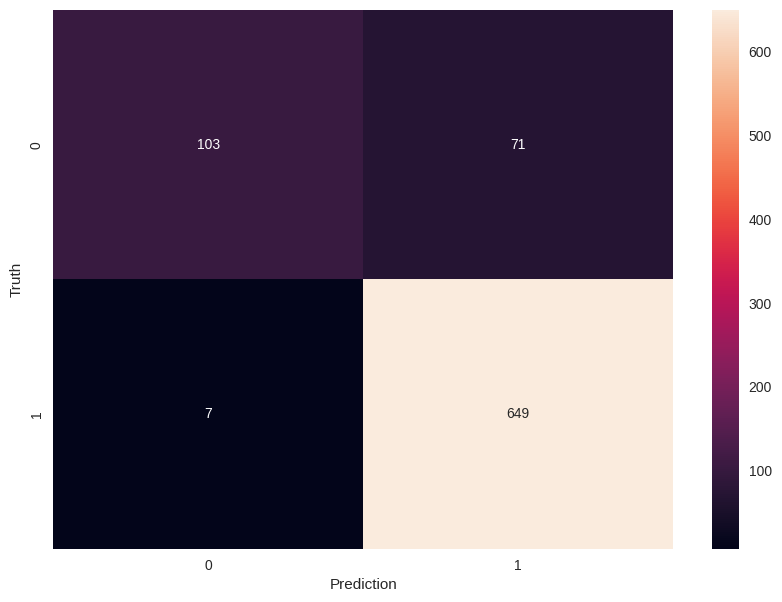

In [568]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [569]:
from sklearn.ensemble import RandomForestClassifier  # For classification

In [570]:
# Split into 70% train, 30% test (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=5  # For reproducibility
)

In [571]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=50,  # Number of trees
    max_depth=5,      # Max depth of each tree
    random_state=5    # For reproducibility
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=5)

In [572]:
y_pred = rf_model.predict(X_test)

In [573]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       656

    accuracy                           1.00       830
   macro avg       1.00      1.00      1.00       830
weighted avg       1.00      1.00      1.00       830



Text(95.72222222222221, 0.5, 'Truth')

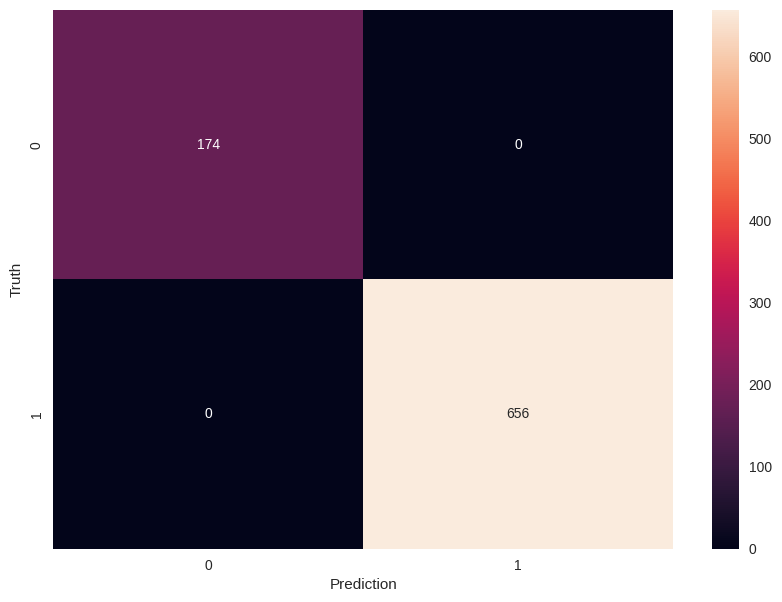

In [574]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [575]:
import xgboost as xgb

In [576]:
# Split into 70% train, 30% test (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=5  # For reproducibility
)

In [577]:
# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=100,            # Number of boosting rounds (trees)
    max_depth=6,                 # Depth of each tree
    learning_rate=0.1,           # Step size shrinkage (default=0.3)
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [578]:
y_pred = xgb_model.predict(X_test)

In [579]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       656

    accuracy                           1.00       830
   macro avg       1.00      1.00      1.00       830
weighted avg       1.00      1.00      1.00       830

Confusion Matrix:
 [[174   0]
 [  0 656]]


Text(95.72222222222221, 0.5, 'Truth')

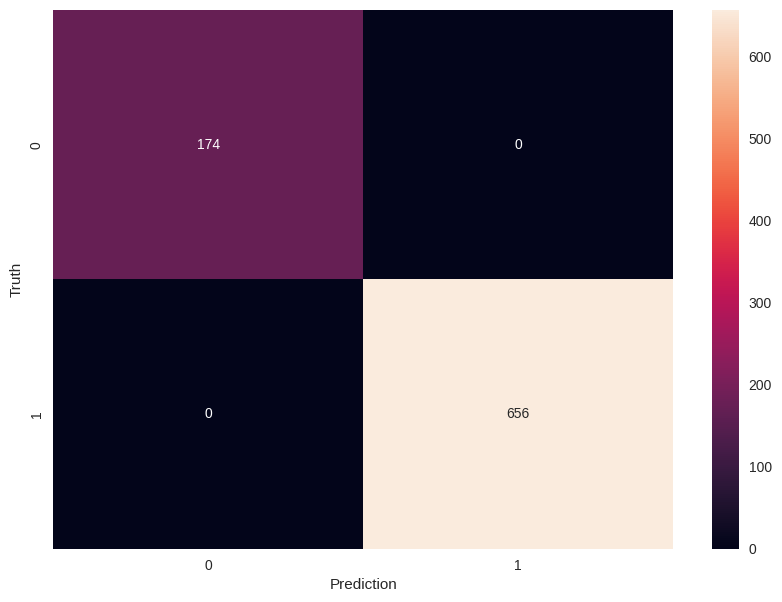

In [580]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Class count

In [581]:
count_class_0, count_class_1 = final_df.Churned.value_counts()

In [582]:
count_class_0, count_class_1

(3245, 904)

In [583]:
df_class_0 = final_df[final_df['Churned'] == 1 ]
df_class_1 = final_df[final_df['Churned'] == 0 ]

In [584]:
df_class_0.shape

(3245, 23)

In [585]:
df_class_1.shape

(904, 23)

# Under Sampling

In [586]:
df_class_0_under = df_class_0.sample(count_class_1, replace=True)

In [587]:
df_class_0_under.shape

(904, 23)

In [588]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [589]:
df_test_under.shape

(1808, 23)

In [590]:
print('Random Under Sampling')
print(df_test_under.Churned.value_counts())

Random Under Sampling
Churned
1    904
0    904
Name: count, dtype: int64


In [591]:
X = df_test_under.drop(['Username', 'Churned'], axis=1)
y = df_test_under['Churned']

In [592]:
# Split into 70% train, 30% test (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=5  # For reproducibility
)

In [593]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=50,  # Number of trees
    max_depth=5,      # Max depth of each tree
    random_state=5    # For reproducibility
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=5)

In [594]:
y_pred = rf_model.predict(X_test)

In [595]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       178

    accuracy                           1.00       362
   macro avg       1.00      1.00      1.00       362
weighted avg       1.00      1.00      1.00       362



In [602]:
model = keras.Sequential([
    keras.layers.Dense(21, input_shape=(21,), activation='relu'),  # Note the colon (:) and comma
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train, epochs=5)

model.evaluate(X_test, y_test)

yp = model.predict(X_test)
yp[:5]

y_test[:10]

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:10]

print(classification_report(y_test,y_pred))

Epoch 1/5
46/46 [==============================] - 3s 5ms/step - loss: 0.6412 - accuracy: 0.8416
Epoch 2/5
46/46 [==============================] - 0s 9ms/step - loss: 0.5869 - accuracy: 0.9156
Epoch 3/5
46/46 [==============================] - 0s 6ms/step - loss: 0.5356 - accuracy: 0.9177
Epoch 4/5
46/46 [==============================] - 0s 8ms/step - loss: 0.4836 - accuracy: 0.9101
Epoch 5/5
12/12 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       184
           1       0.96      0.84      0.90       178

    accuracy                           0.91       362
   macro avg       0.91      0.91      0.91       362
weighted avg       0.91      0.91      0.91       362



# Over Sampling

In [603]:
count_class_0, count_class_1

(3245, 904)

In [604]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

In [605]:
df_class_1_over.shape

(3245, 23)

In [606]:
df_test_over = pd.concat([df_class_0, df_class_1_over],axis=0)

In [607]:
df_test_over.shape

(6490, 23)

In [614]:
print('Random over-sampling:')
print(df_test_over.Churned.value_counts())

Random over-sampling:
Churned
1    3245
0    3245
Name: count, dtype: int64


In [615]:
X = df_test_over.drop(['Username', 'Churned'], axis=1)
y = df_test_over['Churned']

In [616]:
# Split into 70% train, 30% test (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=5  # For reproducibility
)

In [617]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=50,  # Number of trees
    max_depth=5,      # Max depth of each tree
    random_state=5    # For reproducibility
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=5)

In [618]:
y_pred = rf_model.predict(X_test)

In [619]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       663
           1       1.00      1.00      1.00       635

    accuracy                           1.00      1298
   macro avg       1.00      1.00      1.00      1298
weighted avg       1.00      1.00      1.00      1298



In [620]:
model = keras.Sequential([
    keras.layers.Dense(21, input_shape=(21,), activation='relu'),  # Note the colon (:) and comma
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train, epochs=5)

model.evaluate(X_test, y_test)

yp = model.predict(X_test)
yp[:5]

y_test[:10]

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:10]

print(classification_report(y_test,y_pred))

Epoch 1/5
163/163 [==============================] - 2s 5ms/step - loss: 0.5980 - accuracy: 0.8683
Epoch 2/5
163/163 [==============================] - 1s 7ms/step - loss: 0.4084 - accuracy: 0.8964
Epoch 3/5
163/163 [==============================] - 2s 14ms/step - loss: 0.2995 - accuracy: 0.9049
Epoch 4/5
163/163 [==============================] - 2s 12ms/step - loss: 0.2406 - accuracy: 0.9160
Epoch 5/5
41/41 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       663
           1       0.98      0.89      0.93       635

    accuracy                           0.94      1298
   macro avg       0.94      0.94      0.94      1298
weighted avg       0.94      0.94      0.94      1298



# SMOTE

In [621]:
X = final_df.drop(['Username', 'Churned'], axis=1)
y = final_df['Churned']

In [625]:
y.value_counts()

Churned
1    3245
0     904
Name: count, dtype: int64

In [623]:
from imblearn.over_sampling import SMOTE

In [624]:
smote = SMOTE(sampling_strategy='minority')

In [627]:
X_sm, y_sm = smote.fit_resample(X,y)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cea0ae25700>
Traceback (most recent call last):
  File "/home/julhas/Desktop/bustabit_game_prediction/myenv/lib/python3.8/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/julhas/Desktop/bustabit_game_prediction/myenv/lib/python3.8/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/home/julhas/Desktop/bustabit_game_prediction/myenv/lib/python3.8/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.8/ctypes/__init__.py", line 373, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [629]:
y_sm.value_counts()

Churned
0    3245
1    3245
Name: count, dtype: int64